In [1]:
import sys
sys.path.append('/hpc/home/zg64/grism_sim/pyLINEAR/')
import pylinear
import numpy as np
from astropy.io import fits
import glob
import matplotlib.pyplot as plt

**WARNING**: LOCAL JWST PRD VERSION PRDOPSSOC-059 CANNOT BE CHECKED AGAINST ONLINE VERSION


In [2]:
import os
#os.chdir('/hpc/group/cosmology/zg64/Data/grism_sim/pylinear_test_data/wfc3/')
os.chdir('/hpc/group/cosmology/zg64/package-repo/Roman_grism_sim/pylinear_extraction/wfc3/')

In [3]:
segfile = 'roman_grism_test_segmap.fits'
obslst  = 'obs_figs.lst'
imglst  = 'flt_figs.lst'
beam    = '+1'
path    = 'tables_figs'
method  = 'golden'
maglim  = 22.                         # the segmap isn't deep, but lets be more restrictive for time
logdamp = [-4,-1,0.1]
root    = 'figs'
progid  = 'coi'                       # program ID for FIGS

In [4]:
# step 1a. make an observations file
with open(obslst,'w') as fp:
    print('roman_grism_test_dirimg.fits  hst_wfc3_f140w',file=fp)

# step 1b. load the sources    
sources = pylinear.source.SourceCollection(segfile,obslst,detindex=0,maglim=maglim)

# step 1c. make an FLT lst
with open(imglst,'w') as fp:

        print('roman_example_flt.fits',file=fp)

# step 1d. Load the grism images        
grisms = pylinear.grism.GrismCollection(imglst,observed=True)

# step 1e. set the default ranges
extraction_parameters = grisms.get_default_extraction()
sources.update_extraction_parameters(*extraction_parameters)

     2: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 44.05it/s]


info> Loading source catalog
info> Loading an observational catalog
debug> implement source filtering
info> Loading sources from CLASSIC segmentation map
zeropoint: 26.4524   mag:  19.5
zeropoint: 26.4524   mag:  19.5
info> Loading broadband photometry
info> Loaded 2 sources
info> Loading grism collection
info> Loading observed grism images
info> Loaded 1 images
info> updating extraction parameters.
info> Parallel Processing: 76 processes
Default extraction parameters:
Default parameters: range = 10500.0, 17520.0 A, sampling = 45.0 A
info> updating extraction parameters.
info> Building the matrix: 1 images, 2 sources.
info> Compressing the indices
info> Building a damping target
info> Running LSQR with l=0.002294602168820872
info> Running LSQR with l=0.0321074218012122
info> Running LSQR with l=0.16398697926467157
info> Running LSQR with l=2.2946021688208718
info> Running LSQR with l=0.4492659114197117
info> Running LSQR with l=0.8375549284164742
info> Running LSQR with l=0.30571672407

In [5]:
# step 2a. compute the pixel tables for the beam to extract
tabulate = pylinear.modules.Tabulate('pdt',path=path,ncpu=0)   # note the ncpu = 0
tabnames = tabulate.run(grisms,sources,beam)

Making tables: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.75s/it]


In [6]:
extraction_parameters = grisms.get_default_extraction()

extpar_fmt = 'Default parameters: range = {lamb0}, {lamb1} A,' + \
                ' sampling = {dlamb} A'
print("Default extraction parameters:")
print(extpar_fmt.format(**extraction_parameters))

# Set extraction params
sources.update_extraction_parameters(**extraction_parameters)

In [7]:
pylinear.modules.extract.extract1d(grisms, sources, beam, logdamp,
                                    method, root, path,
                                    inverter='lsqr', ncpu=6,
                                    group=False)

Loading ODTs: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.01s/it]


In [8]:
x1d = fits.open(root + '_x1d.fits')

spec1 = x1d[('SOURCE', 1)].data
spec2 = x1d[('SOURCE', 2)].data

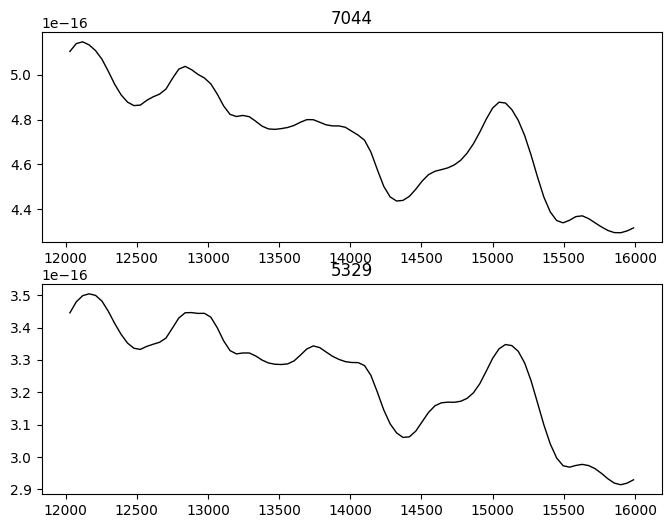

In [9]:
pylinear_flam_scale_fac = 1e-17

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))
ax1.set_title('7044')
ax2.set_title('5329')
mask, = np.where((spec2['wavelength'] > 1.2e4) & (spec2['wavelength'] < 1.6e4))

ax1.plot(spec1['wavelength'][mask], spec1['flam'][mask] * pylinear_flam_scale_fac,
            color='k', lw=1)


ax2.plot(spec2['wavelength'][mask], spec2['flam'][mask] * pylinear_flam_scale_fac,
            color='k', lw=1)
